# Predicting Modeling of Red Lightning Alerts

This use case aims to develop a predictive model for forecasting Red Lightning Alerts three hours before the event occurs. The model will leverage historical data on Red Lightning Alerts and various weather parameters to identify patterns and indicators that precede these severe weather events.

## I. Exploratory Data Analysis

### Import Libraries

In [16]:
# Data Transformation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
warnings.filterwarnings('ignore')

### Load Data

Load both lightning alert file and weather file

In [19]:
file_path_lightning_alert = "Ligthning_Alert_Monitoring_July_2023_to_July_2024.csv"

In [22]:
df_lightning = pd.read_csv(file_path_lightning_alert,encoding='latin1')

### Initial Data Inspection

In [25]:
df_lightning.head()

DATE STATION   LEVEL TIME STARTED (UTC) TIME ENDED (UTC)  \
0   8/4/2023  9:00:00 PM    RPMD     RED        09:25:00 PM      10:24:00 PM   
1   8/7/2023  4:00:00 PM    RPLL  YELLOW        04:44:00 PM      06:21:00 PM   
2  8/11/2023  8:00:00 PM    RPLL  YELLOW        08:41:00 PM      09:12:00 PM   
3  8/15/2023  2:00:00 AM    RPLL  YELLOW        02:03:00 AM      02:37:00 AM   
4  8/25/2023  2:00:00 PM    RPLC     RED        02:27:00 PM      03:25:00 PM   

    TOTAL TIME cloud_friendly  \
0  12:59:00 AM  Partly cloudy   
1  01:37:00 AM  Partly cloudy   
2  12:31:00 AM  Partly cloudy   
3  12:34:00 AM  Partly cloudy   
4  12:58:00 AM  Partly cloudy   

                                              clouds  pressure (mb)  temp_air  \
0  [{'altitude': 1600, 'symbol': 'FEW016', 'type'...         1014.0      24.0   
1  [{'altitude': 1600, 'symbol': 'FEW016', 'type'...         1007.0      29.0   
2  [{'altitude': 3000, 'symbol': 'FEW030', 'type'...         1008.0      28.0   
3  [{'altitude': 2500, 'symbol': 'FEW025', 'type'...         1010.0      31.0   
4  [{'altitude': 2000, 'symbol': 'SCT020', 'type'...         1009.0      28.0   

   ...  temp_perceived  relative_humidity  visibility (m)  wind_direction  \
0  ...            24.0              100.0         10000.0             330   
1  ...            36.0               89.0         10000.0             250   
2  ...            31.0               79.0         10000.0             220   
3  ...            37.0               75.0         10000.0             270   
4  ...            32.0               84.0          8000.0             320   

   wind_friendly wind_speed (KT)  clouds_altitude  clouds_symbol clouds_type  \
0     Calm winds               3           1600.0         FEW016         FEW   
1    Light winds              10           2300.0         SCT023         SCT   
2    Light winds               6          13000.0         BKN130         BKN   
3          Windy              11           2500.0         FEW025         FEW   
4     Calm winds               2          10000.0         BKN100         BKN   

      processtimestamp  
0  08/05/2023 06:01:16  
1  08/08/2023 06:02:56  
2  08/12/2023 06:02:14  
3  08/15/2023 20:07:04  
4  08/26/2023 06:37:51  

[5 rows x 21 columns]

In [27]:
df_lightning.tail()

DATE STATION   LEVEL TIME STARTED (UTC)  \
366  7/10/2024  4:00:00 AM    RPLL  YELLOW        04:08:00 AM   
367  7/11/2024  2:00:00 AM    RPLC  YELLOW        02:23:00 AM   
368  7/11/2024  2:00:00 AM    RPLC   AMBER        02:51:00 AM   
369  7/11/2024  1:00:00 AM    RPLL  YELLOW        01:20:00 AM   
370  7/11/2024  1:00:00 AM    RPLL  YELLOW        01:44:00 AM   

    TIME ENDED (UTC)   TOTAL TIME  cloud_friendly  \
366      04:34:00 AM  12:26:00 AM   Partly cloudy   
367      02:50:00 AM  12:27:00 AM   Partly cloudy   
368      03:38:00 AM  12:47:00 AM   Partly cloudy   
369      01:38:00 AM  12:18:00 AM  Overcast skies   
370      02:12:00 AM  12:28:00 AM  Overcast skies   

                                                clouds  pressure (mb)  \
366  [{'altitude': 2300, 'symbol': 'SCT023', 'type'...         1010.0   
367  [{'altitude': 2000, 'symbol': 'SCT020', 'type'...         1010.0   
368  [{'altitude': 2000, 'symbol': 'SCT020', 'type'...         1010.0   
369  [{'altitude': 2300, 'symbol': 'SCT023', 'type'...         1010.0   
370  [{'altitude': 2300, 'symbol': 'SCT023', 'type'...         1010.0   

     temp_air  ...  temp_perceived  relative_humidity  visibility (m)  \
366      32.0  ...            38.0               67.0         10000.0   
367      29.0  ...            33.0               74.0          8000.0   
368      29.0  ...            33.0               74.0          8000.0   
369      29.0  ...            35.0               84.0          8000.0   
370      29.0  ...            35.0               84.0          8000.0   

     wind_direction  wind_friendly wind_speed (KT)  clouds_altitude  \
366               0    Light winds               4          10000.0   
367             140    Light winds               6          10000.0   
368             140    Light winds               6          10000.0   
369               0     Calm winds               0          10000.0   
370               0     Calm winds               0          10000.0   

     clouds_symbol clouds_type     processtimestamp  
366         BKN100         BKN  07/10/2024 18:01:07  
367         BKN100         BKN  07/11/2024 18:01:06  
368         BKN100         BKN  07/11/2024 18:01:06  
369         OVC100         OVC  07/11/2024 18:01:06  
370         OVC100         OVC  07/11/2024 18:01:06  

[5 rows x 21 columns]

### Data Exploration

1) How frequently do RLA occur across different airports?

First of all we must first isolate all "RED" level instances. Utilizing the `pandas` library we are able to store all appearances of RLAs within a new data frame "red_alerts".  

In [32]:
red_alerts = df_lightning[df_lightning['LEVEL'] == 'RED']
print("There have been " + str(len(red_alerts)) + " instances of RLAs from July 2023 - July 2024 from the original data frame")

There have been 133 instances of RLAs from July 2023 - July 2024 from the original data frame


Then we can then group each red light alert by station. 

In [35]:
rla_counts = red_alerts.groupby('STATION').size().reset_index(name='RLA_Count')
rla_counts.head()

STATION  RLA_Count
0    RPLC         40
1    RPLL         41
2    RPMD         36
3    RPVM         15
4    RPVP          1

We are able to visualize this data through the `matplotlib` library to display the distribution of red light alerts along each station.

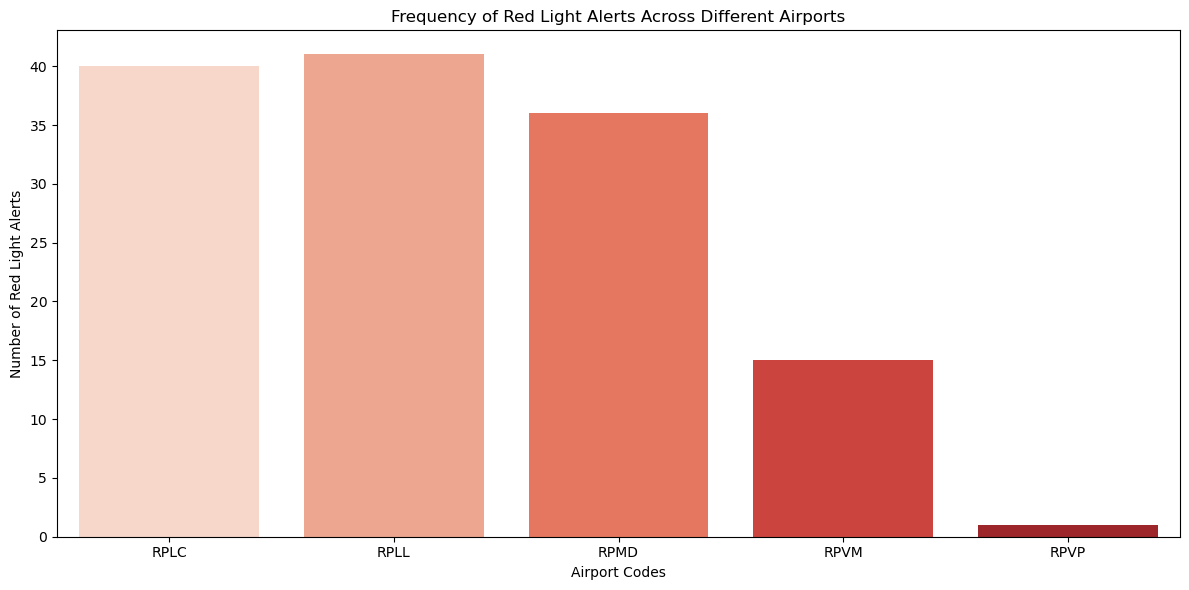

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='STATION', y='RLA_Count', data=rla_counts, palette='Reds')
plt.title('Frequency of Red Light Alerts Across Different Airports')
plt.xlabel('Airport Codes')
plt.ylabel('Number of Red Light Alerts')
plt.tight_layout()

Key:
RPLC = "Clark International Airport",
RPLL = "Ninoy Aquino International Airport",
RPMD = "Davao International Airport",
RPVM = "Mactan-Cebu International Airport",
RPVP = "Puerto Princesa International Airport"


Summary: Most Red Light Alerts seemingly occur in Clark International Airport, Ninoy Aquino International Airport, and RPMB stations, with 40, 41, and 36 instances respectively, it should be noted, however, that this may be due to incomplete data, as these airports also had the most amount of data entries within original data frame

2) What is the distribution of  RLA  across different times of the day, days of the week, and months of the year?

First of all in order to break down the "DATE" column's data into different parts we must use the `pandas` built in date parsing function, we have to change the data format in one recognizable to the library through its very own "to_datetime" function.

In [44]:
df_lightning['DATE'] = pd.to_datetime(df_lightning['DATE'], format='%m/%d/%Y %I:%M:%S %p')

Now we can divide the "DATE" column into extra columns for "hour", "day_of_week", and "month".

In [47]:
df_lightning['hour'] = df_lightning['DATE'].dt.hour
df_lightning['day_of_week'] = df_lightning['DATE'].dt.day_name()
df_lightning['month'] = df_lightning['DATE'].dt.month_name()

Then once again we isolate "RED" instances.

In [50]:
rla_data = df_lightning[df_lightning['LEVEL'] == 'RED']

Now we can visualize each the distribution in a similar way to previously.

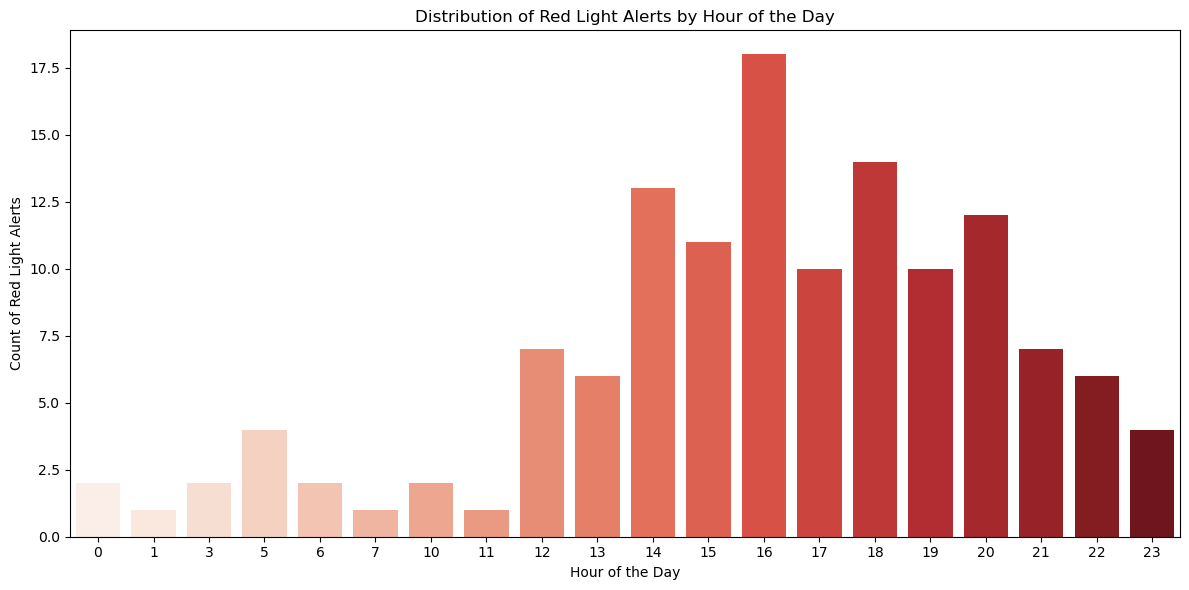

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=rla_data, palette='Reds')
plt.title('Distribution of Red Light Alerts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Red Light Alerts')
plt.tight_layout()
plt.show()

It appears as though from 12:00 PM onwards throughout the day is when most appears red light alerts. This could signify a pattern, however, may also be a result of majority of sample data being taken in the afternoon onwards.

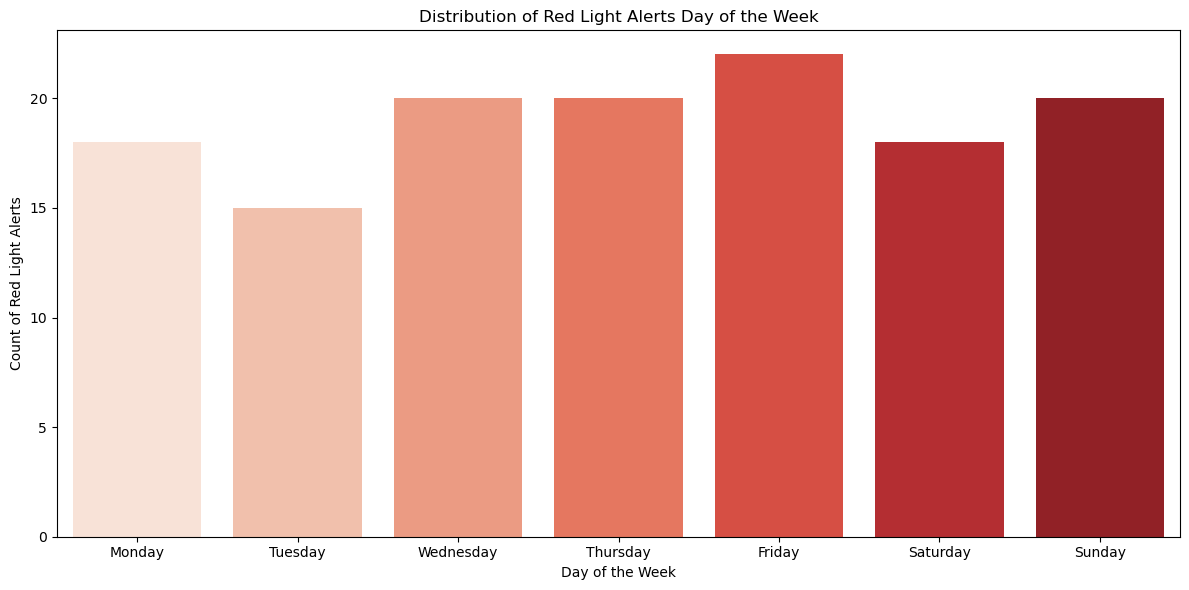

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=rla_data, palette='Reds', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Red Light Alerts Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Red Light Alerts')
plt.tight_layout()
plt.show()

In this case there seems to not be much of a pattern with red light alerts being distributed pretty equally amongst days of the week.

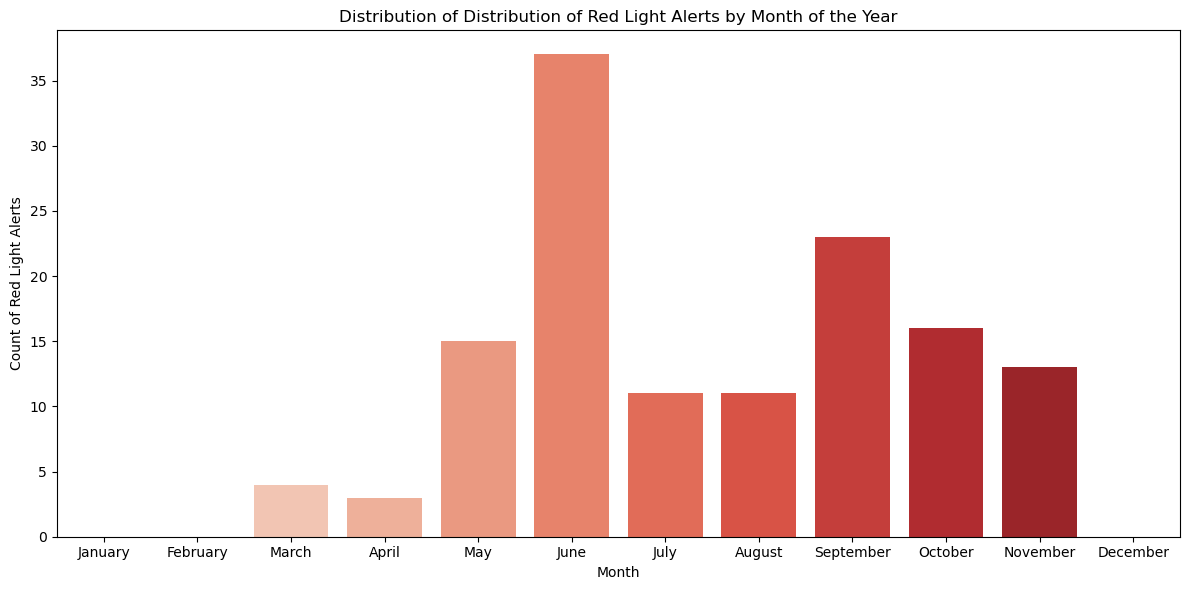

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=rla_data, palette='Reds', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Distribution of Red Light Alerts by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Count of Red Light Alerts')
plt.tight_layout()
plt.show()

3) Are there specific times of the year when RLAs are more common?

As seen in the distribution above, summer and fall months such as "June" and "September" along with its surounding months seem to experience large amounts of RLAs. Particularly the trio of "May", "June", and "July", and the trio of "September", "October", "November". The largest issue with the data is the lack of entries for "December", "January", and "Febuary", due to the lack RLA instaces experienced in these months

4) What is the average duration of an RLA event? Per airport?

### Format Fixing

In [144]:
df_lightning['TIME STARTED (UTC)'] = df_lightning['TIME STARTED (UTC)'].astype(str)
df_lightning['TIME ENDED (UTC)'] = df_lightning['TIME ENDED (UTC)'].astype(str)

In [146]:
df_lightning['TIME STARTED (UTC)'] = pd.to_datetime(df_lightning['TIME STARTED (UTC)'], infer_datetime_format=True)
df_lightning['TIME ENDED (UTC)'] = pd.to_datetime(df_lightning['TIME ENDED (UTC)'], infer_datetime_format=True)

### Error Handling

In [149]:
df_lightning['TIME ENDED (UTC)'] = df_lightning.apply(
    lambda row: row['TIME ENDED (UTC)'].replace(
        year=row['TIME STARTED (UTC)'].year,
        month=row['TIME STARTED (UTC)'].month,
        day=row['TIME STARTED (UTC)'].day
    ),
    axis=1
)

In [151]:
df_lightning['TIME ENDED (UTC)'] = df_lightning.apply(
    lambda row: row['TIME ENDED (UTC)'] + pd.Timedelta(days=1) 
    if row['TIME ENDED (UTC)'] < row['TIME STARTED (UTC)'] else row['TIME ENDED (UTC)'],
    axis=1
)

### Time Difference Calculations

In [154]:
df_lightning['TIME_DIFFERENCE'] = df_lightning['TIME ENDED (UTC)'] - df_lightning['TIME STARTED (UTC)']

In [156]:
df_lightning['TIME_DIFFERENCE_SECONDS'] = df_lightning['TIME_DIFFERENCE'].dt.total_seconds()

In [158]:
print(df_lightning['TIME_DIFFERENCE_SECONDS'])

0      3540.0
1      5820.0
2      1860.0
3      2040.0
4      3480.0
        ...  
366    1560.0
367    1620.0
368    2820.0
369    1080.0
370    1680.0
Name: TIME_DIFFERENCE_SECONDS, Length: 371, dtype: float64


### Average Duration Calculation

In [161]:
mean_time_difference = df_lightning[df_lightning['LEVEL'] == 'RED']

In [189]:
mean_time_difference = df_lightning.groupby('STATION')['TIME_DIFFERENCE_SECONDS'].mean()

In [191]:
print(mean_time_difference)

STATION
RPLC    1844.050633
RPLL    1866.602871
RPMD    3532.105263
RPVM    2569.090909
RPVP     960.000000
Name: TIME_DIFFERENCE_SECONDS, dtype: float64


### Data Visualization

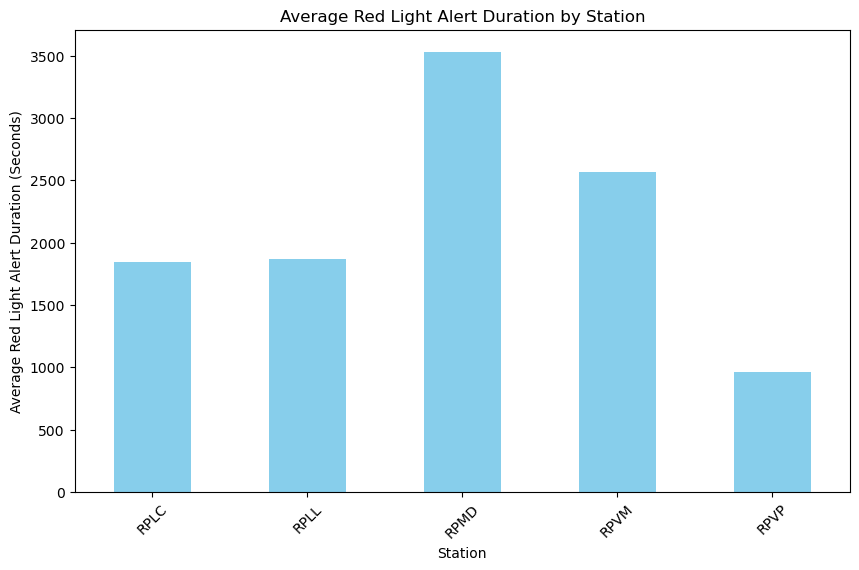

In [194]:
plt.figure(figsize=(10, 6))
mean_time_difference.plot(kind='bar', color='skyblue')
plt.xlabel('Station')
plt.ylabel('Average Red Light Alert Duration (Seconds)')
plt.title('Average Red Light Alert Duration by Station')
plt.xticks(rotation=45)
plt.show()

Summary: Davao International Airport has the highest average red light duration followed by airport Mactan-Cebu International Airport , Clark International Airport, Ninoy Aquino International Airport, and finally Puerto Princesa International Airport

5) What weather conditions (e.g., air pressure, wind speed, cloud type, etc..) are most strongly correlated with the start of an RLA?

In [176]:
rla_mapping = {'YELLOW': 1, 'AMBER': 2, 'RED': 3}
df_lightning['RLA_LEVEL_ENCODED'] = df_lightning['LEVEL'].map(rla_mapping)

In [178]:
cloud_mapping = {'Partly cloudy': 1, 'Overcast skies': 2, 'Raining': 3, 'Showers': 4, 'Thunderstorms': 5}
df_lightning['CLOUDS_ENCODED'] = df_lightning['cloud_friendly'].map(cloud_mapping)

In [180]:
wind_mapping = {'Calm winds': 1, 'Light winds': 2, 'Windy': 3}
df_lightning['WIND_ENCODED'] = df_lightning['wind_friendly'].map(wind_mapping)

In [182]:
clouds_type_mapping = {'FEW': 1, 'SCT': 2, 'BKN': 3, 'OVC': 4}
df_lightning['CLOUDS_TYPE_ENCODED'] = df_lightning['clouds_type'].map(clouds_type_mapping)

In [184]:
columns_to_compare = ['CLOUDS_ENCODED', 'pressure (mb)', 'temp_air', 'temp_dewpoint', 'temp_perceived', 'relative_humidity', 'visibility (m)', 'wind_direction', 'WIND_ENCODED', 'wind_speed (KT)', 'clouds_altitude', 'CLOUDS_TYPE_ENCODED']

In [186]:
correlation_results = {}

In [105]:
for column in columns_to_compare:
    correlation = df_lightning['RLA_LEVEL_ENCODED'].corr(df_lightning[column])
    correlation_results[column] = correlation

In [107]:
for column, correlation in correlation_results.items():
    print(f"Correlation between RLA levels and {column}: {correlation:.2f}")

Correlation between RLA levels and CLOUDS_ENCODED: -0.07
Correlation between RLA levels and pressure (mb): 0.16
Correlation between RLA levels and temp_air: -0.34
Correlation between RLA levels and temp_dewpoint: -0.23
Correlation between RLA levels and temp_perceived: -0.36
Correlation between RLA levels and relative_humidity: 0.23
Correlation between RLA levels and visibility (m): -0.02
Correlation between RLA levels and wind_direction: 0.15
Correlation between RLA levels and WIND_ENCODED: -0.16
Correlation between RLA levels and wind_speed (KT): -0.16
Correlation between RLA levels and clouds_altitude: 0.21
Correlation between RLA levels and CLOUDS_TYPE_ENCODED: -0.01


Primarily the weather condition that sees the highest correlation with RLA levels would be temp_percieved and temp_air. With a seemingly inverse relationship. The factors that seem to be the least impacted are clouds type, visibility, and cloud_friendly. 

6) Are there any outlier RLA events in terms of duration or associated weather conditions?

### Duration Outliers

In [112]:
Q1 = df_lightning['TIME_DIFFERENCE_SECONDS'].quantile(0.25)
Q3 = df_lightning['TIME_DIFFERENCE_SECONDS'].quantile(0.75)
IQR = Q3 - Q1

In [114]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [116]:
outliers_duration = df_lightning[(df_lightning['TIME_DIFFERENCE_SECONDS'] < lower_bound) | (df_lightning['TIME_DIFFERENCE_SECONDS'] > upper_bound)]

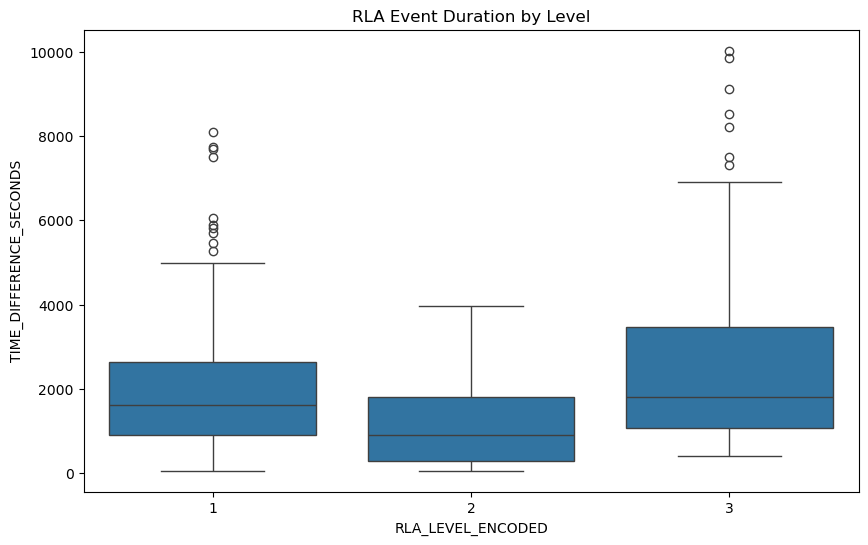

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RLA_LEVEL_ENCODED', y='TIME_DIFFERENCE_SECONDS', data=df_lightning)
plt.title('RLA Event Duration by Level')
plt.show()

### Weather Conditions Outliers

In [121]:
outliers_weather = []
for column in columns_to_compare:
    Q1 = df_lightning[column].quantile(0.25)
    Q3 = df_lightning[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_weather.append(df_lightning[(df_lightning[column] < lower_bound) | (df_lightning[column] > upper_bound)])
outliers_weather = pd.concat(outliers_weather).drop_duplicates()

In [123]:
sns.pairplot(df_lightning, hue='RLA_LEVEL_ENCODED', height=6, aspect=1.5)
plt.show()

### Summary of Findings

#### Frequency of RLA Occurrences Across Different Airports:

The data indicates that most Red Light Alerts (RLA) occur at the Clark International Airport, Ninoy Aquino International Airport, and Davao International Airport stations, with 40, 41, and 36 instances respectively. This high count of RLAs at these airports might be due to the incomplete nature of the dataset, as these airports also had the most data entries. In comparison, Mactan-Cebu International Airport recorded 15 instances and Puerto Princesa International Airport recorded just 1 instance of RLA.

#### Distribution of RLA Across Times of Day, Days of the Week, and Months:

RLAs predominantly occur from 12:00 PM onwards throughout the day. This pattern could suggest a genuine trend, but it is also possible that it results from the majority of sample data being collected in the afternoon and later. In terms of the days of the week, RLAs are distributed fairly equally, showing no significant daily pattern.

#### Times of the Year When RLAs Are More Common:

RLAs are more frequent during the summer and fall months, with peaks observed in May, June, July, September, October, and November. This seasonal trend highlights the importance of monitoring RLAs closely during these periods.

#### Average Duration of an RLA Event Per Airport:

The average duration of an RLA event varies across different airports. Davao International Airport has the highest average duration at approximately 3532 seconds, followed by Mactan-Cebu International Airport with 2569 seconds. Clark International Airport and Ninoy Aquino International Airport have similar average durations of around 1844 and 1867 seconds respectively, while Puerto Princesa International Airport has the shortest average duration at 960 seconds. This variation in duration across airports might be influenced by differing operational conditions and response strategies.

#### Weather Conditions Correlated with the Start of an RLA:

The weather conditions most strongly correlated with the onset of RLAs include perceived temperature and air temperature, both showing an inverse relationship with RLA levels. Specifically, higher perceived and air temperatures are associated with fewer RLAs. Other weather factors such as cloud type, visibility, and cloud-friendly conditions exhibit minimal impact on RLA levels. The correlation values reveal nuanced relationships: pressure has a positive correlation (0.16), while variables like temp_dewpoint (-0.23), relative_humidity (0.23), and wind_speed (-0.16) show varying degrees of correlation.

### Conclusion

Our analysis reveals several key insights that can enhance the machine learning (ML) model for predicting Red Light Alerts (RLAs). The concentration of RLAs at Clark International Airport, Ninoy Aquino International Airport, and Davao International Airport suggests location-specific factors influence alert frequency. Incorporating airport-specific features into the model can help capture these unique patterns. The prevalence of RLAs from 12:00 PM onwards and their higher occurrence in summer and fall months (especially May, June, July, September, October, and November) indicate a temporal dependency. Thus, including time and date features (hour, day, month) can improve prediction accuracy. The average duration of RLAs varies across airports, with Davao International Airport having the longest duration. This information can be used to estimate the severity of future alerts. Weather conditions, particularly perceived and air temperature, show a strong inverse correlation with RLA levels, making them essential features for the model. Real-time weather data integration can further enhance predictive capabilities. Addressing data gaps for December, January, and February by prioritizing data collection will also create a more balanced dataset. By leveraging these insights, the ML model can achieve higher accuracy and operational effectiveness, improving RLA management across different airports and conditions.

## END